In [176]:
import pandas as pd
%run main.py
%run EDAmain.py
%run statistics.py

In [177]:
df = pd.read_csv("D:\SERKAN KIZILIRMAK\Python\AllProjects\Müşteri Kayıp Analizi (TelcoCustomer)\Data\TelcoCustomer(TR)_binned.csv")

# Multicollinearity (Kruskal-Wallis)

### The test is more commonly used when we have three or more levels. For two levels, the Mann Whitney U Test is appropriate

The parametric equivalent of the Kruskal–Wallis test is the one-way analysis of variance (ANOVA)

Hypothses -

Fail to Reject H0: All sample distributions are equal.
Reject H0: One or more sample distributions are not equal.###

In [178]:
# compare samples
stat, p = stats.kruskal(df['Toplam Ücret'], df['Müşteri Olma Süresi(Ay)'], df['Aylık Ücret'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=13184.759, p=0.000
Different distributions (reject H0)


In [179]:
# compare samples
stat, p = stats.kruskal(df['Ekipman Güvenlik Aboneliği'], df['IP Tv Aboneliği'], df['Ev Telefonu Aboneliği'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=296.240, p=0.000
Different distributions (reject H0)


In [180]:
# compare samples
stat, p = stats.kruskal(df['Sözleşme Süresi'], df['Ödeme Şekli'], df['Ev Telefonu Aboneliği'], df['İnternet Aboneliği'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=21232.785, p=0.000
Different distributions (reject H0)


# Frequency Distribution

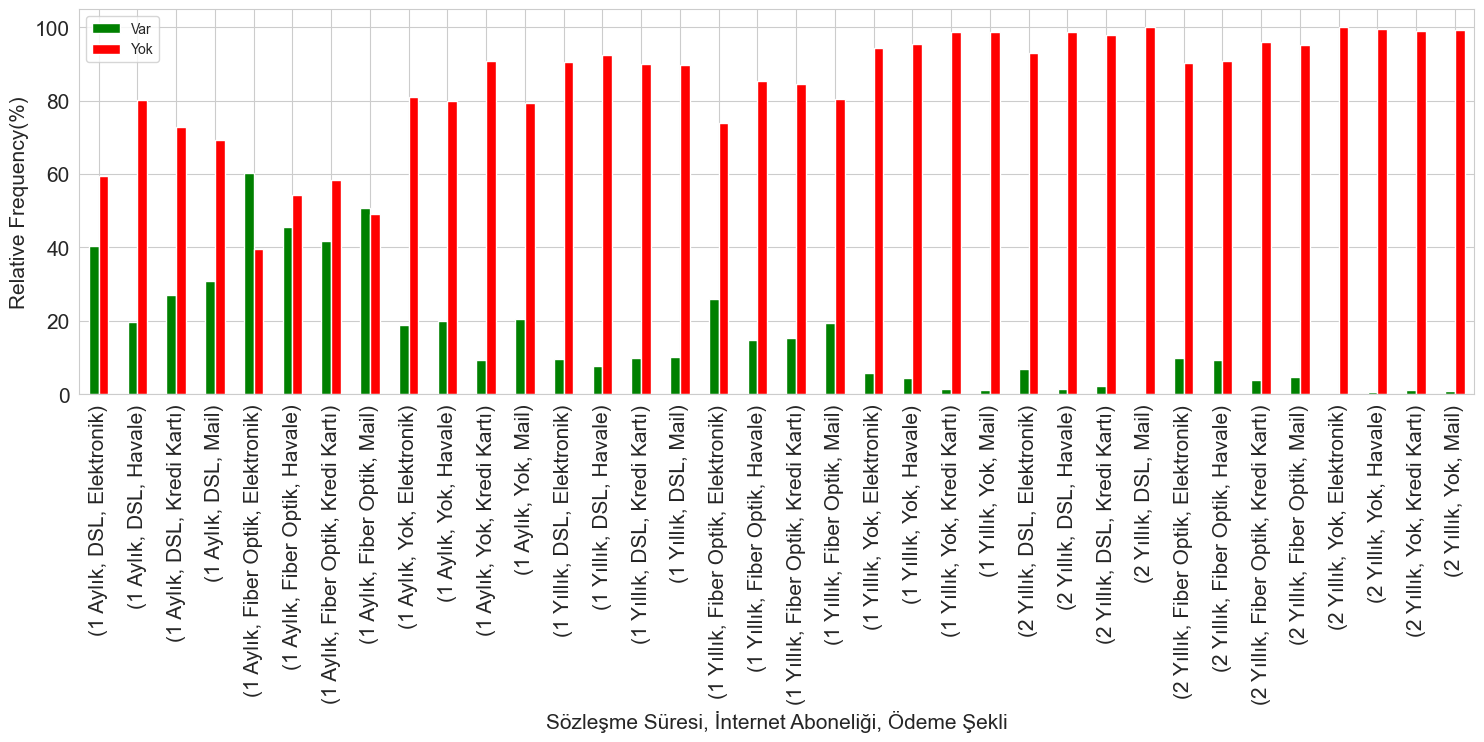

### Findings: Most of the users who churned had a Month-to-month contract and had internet service

In [181]:
multivariate_analysis(df["Sözleşme Süresi"],df["İnternet Aboneliği"],df["Ödeme Şekli"])
printmd("### Findings: Most of the users who churned had a Month-to-month contract and had internet service")

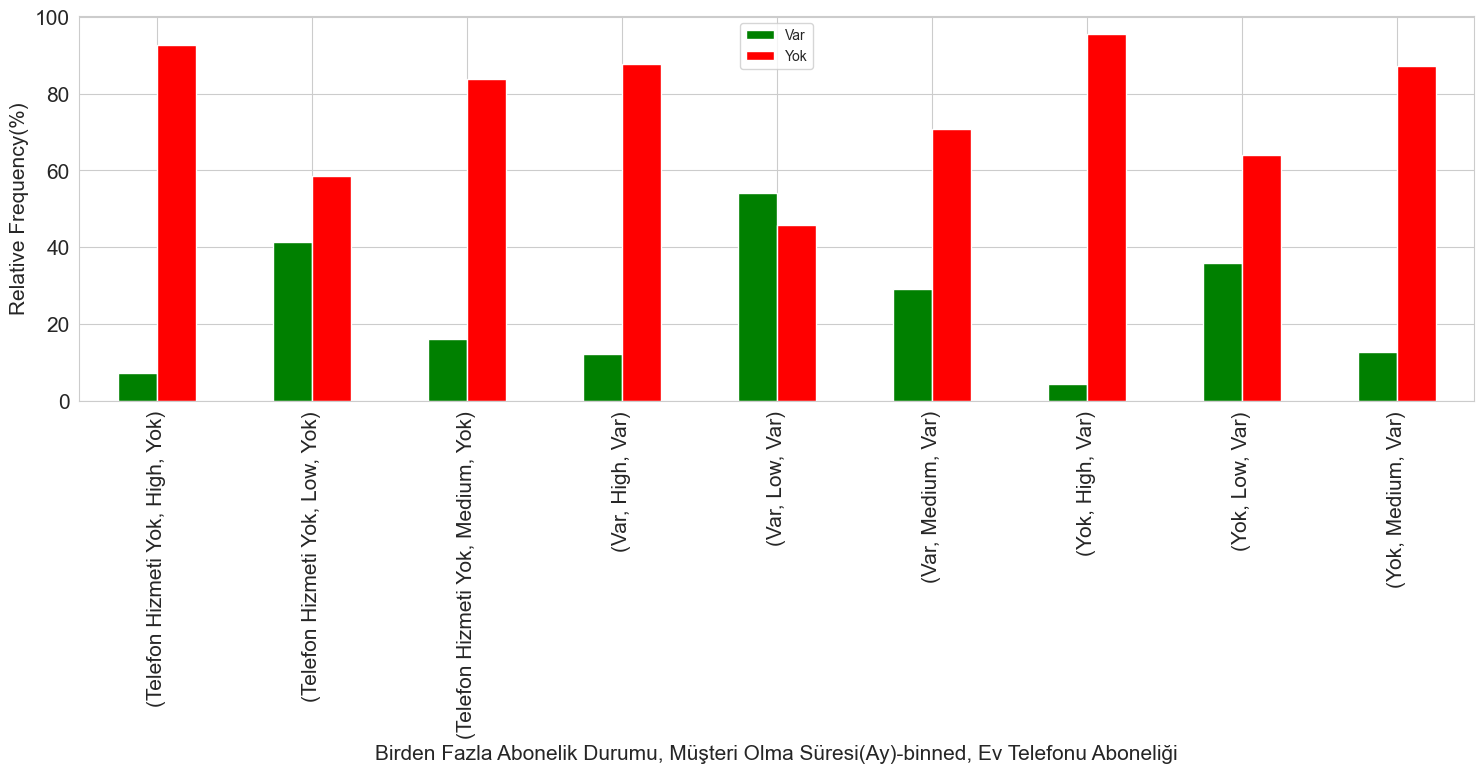

## Findings: Most of the users who churned had phone service

In [182]:
multivariate_analysis(df["Birden Fazla Abonelik Durumu"], df['Müşteri Olma Süresi(Ay)-binned'], df["Ev Telefonu Aboneliği"])
printmd("## Findings: Most of the users who churned had phone service")

# Churn Count Distribution

In [223]:
df_churn = pd.read_csv("D:\SERKAN KIZILIRMAK\Python\AllProjects\Müşteri Kayıp Analizi (TelcoCustomer)\Data\TelcoCustomer.csv")

def plot_counting_distribution(cardinality_value):

  #label encoding binary columns
  le = LabelEncoder()

  tmp_churn = df_churn[df_churn['Churn'] == 'Yes']
  tmp_no_churn = df_churn[df_churn['Churn'] == 'No']

  selected_columns = df_churn.nunique()[df_churn.nunique() == cardinality_value].keys()

  for col in selected_columns :
      tmp_churn[col] = le.fit_transform(tmp_churn[col])


  data_frame_x = tmp_churn[selected_columns].sum().reset_index()
  data_frame_x.columns = ["feature","Yes"]
  data_frame_x["No"] = tmp_churn.shape[0]  - data_frame_x["Yes"]
  data_frame_x = data_frame_x[data_frame_x["feature"] != "Churn"]

  #count of 1's(yes)
  trace1 = go.Scatterpolar(r=data_frame_x["Yes"].values.tolist(),
                          theta=data_frame_x["feature"].tolist(),
                          fill="toself", name="Churn 1's",
                          mode="markers+lines", visible=True,
                          marker=dict(size=5)
                          )

  #count of 0's(No)
  trace2 = go.Scatterpolar(r=data_frame_x["No"].values.tolist(),
                          theta=data_frame_x["feature"].tolist(),
                          fill="toself",name="Churn 0's",
                          mode="markers+lines", visible=True,
                          marker=dict(size = 5)
                          )
  for col in selected_columns :
      tmp_no_churn[col] = le.fit_transform(tmp_no_churn[col])

  data_frame_x = tmp_no_churn[selected_columns].sum().reset_index()
  data_frame_x.columns  = ["feature","Yes"]
  data_frame_x["No"]    = tmp_no_churn.shape[0]  - data_frame_x["Yes"]
  data_frame_x  = data_frame_x[data_frame_x["feature"] != "Churn"]

  #count of 1's(yes)
  trace3 = go.Scatterpolar(r = data_frame_x["Yes"].values.tolist(),
                          theta = data_frame_x["feature"].tolist(),
                          fill  = "toself",name = "NoChurn 1's",
                          mode = "markers+lines", visible=False,
                          marker = dict(size = 5)
                          )

  #count of 0's(No)
  trace4 = go.Scatterpolar(r = data_frame_x["No"].values.tolist(),
                          theta = data_frame_x["feature"].tolist(),
                          fill  = "toself",name = "NoChurn 0's",
                          mode = "markers+lines", visible=False,
                          marker = dict(size = 5)
                          )

  data = [trace1, trace2, trace3, trace4]

  updatemenus = list([
      dict(active=0,
          x=-0.15,
          buttons=list([
              dict(
                  label = 'Churn Dist',
                  method = 'update',
                  args = [{'visible': [True, True, False, False]},
                      {'title': f'Customer Churn Binary Counting Distribution' }]),

              dict(
                    label = 'No-Churn Dist',
                  method = 'update',
                  args = [{'visible': [False, False, True, True]},
                      {'title': f'No Customer Churn Binary Counting Distribution'}]),

          ]),
      )
  ])

  layout = dict(title='ScatterPolar Distribution of Churn and Non-Churn Customers (Select from Dropdown)',
                showlegend=False,
                updatemenus=updatemenus)

  fig = dict(data=data, layout=layout)

  pio.show(fig)

In [225]:
plot_counting_distribution(2)

In [226]:
plot_counting_distribution(3)